Este colab fue desarrollado por Arnold Charry Armero.

# Suavización Exponencial Simple

La Suavización Exponencial Simple es una técnica de pronóstico que emplea los promedios móviles ponderados para ponderar los datos con una constante de suavización llamada $\alpha $ que hará que el pronóstico se comporte de forma exponencial (Heizer & Render, 2004). Su modo de operar es tomando el pronóstico anterior y sumándole una fracción a la diferencia entre la demanda real y el pronóstico en el período anterior. Matemáticamente se modela así:

$$ F_{t} = F_{t-1} + \alpha (D_{t - 1} - F_{t - 1}) $$

donde,

$ F_{t} = \mathrm{Nuevo \: Pronostico} $

$ F_{t-1} = \mathrm{Anterior \: Pronostico} $

$ \alpha = \mathrm{Constante \: de \: Suavizacion} \: (0 \leq \alpha \leq 1)$

$ D_{t-1} = \mathrm{Demanda \: Real \: en \: el \: periodo \: anterior} $



Ahora se continua con la implementación en código.

In [1]:
#Se importan las librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

In [2]:
#Conectamos con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Se ingresa la base de datos
df = pd.read_csv("/content/drive/MyDrive/Operations I/sales-cars.csv")
df.head(10)

,Month,Sales
0,2016-01,266.0
1,2016-02,146.0
2,2016-03,183.0
3,2016-04,119.0
4,2016-05,180.0
5,2016-06,169.0
6,2016-07,232.0
7,2016-08,225.0
8,2016-09,193.0
9,2016-10,123.0


In [4]:
#Se pasa al formato de series de tiempo
df["Month"] = pd.to_datetime(df.iloc[:, 0], format = '%Y/%m')
df.head(10)

,Month,Sales
0,2016-01-01,266.0
1,2016-02-01,146.0
2,2016-03-01,183.0
3,2016-04-01,119.0
4,2016-05-01,180.0
5,2016-06-01,169.0
6,2016-07-01,232.0
7,2016-08-01,225.0
8,2016-09-01,193.0
9,2016-10-01,123.0


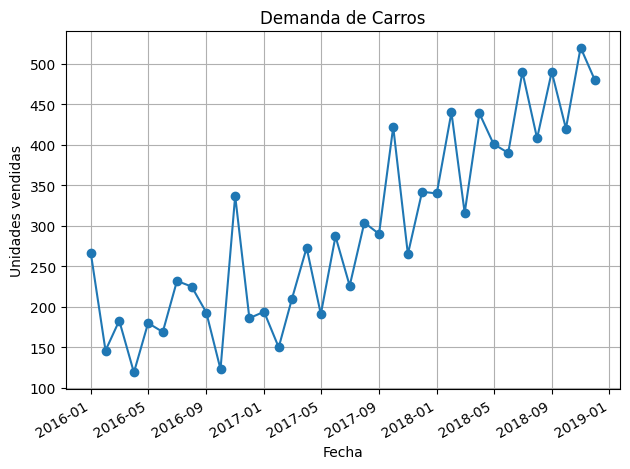

In [5]:
#Se realiza el gráfico de los datos
plt.plot_date(df.iloc[:, 0], df.iloc[:, 1], linestyle = 'solid')
plt.gcf().autofmt_xdate()

plt.title("Demanda de Carros")
plt.xlabel("Fecha")
plt.ylabel("Unidades vendidas")

plt.grid()
plt.tight_layout()
plt.show()

## Pronósticos con Suavización Exponencial Simple

### Suavización Exponencial Simple

Utilizando el conocimiento adquirido en Pensamiento Algorítmico, es posible crear una función con bucles y condicionales para pronosticar usando el método de Suavización Exponencial Simple a una columna de datos.

In [6]:
#Se realiza el código de la suavización exponencial simple manualmente

def Suavizacion_Exponencial_Simple(alpha, initial_forecast, number_column):
  """
  Calcula la Suavización Exponencial Simple tomando en cuenta
  el alpha escogido.

  Args:
    alpha: Constante de la suavización exponencial
    initial_forecast: Valor inicial de pronóstico
    number_column: Número de la columna seleccionada del dataframe.

  Returns:
    Simple_Exponential_Smoothing: lista con los respectivos pronósticos.
  """

  if alpha >= 0 and alpha <= 1:
    Simple_Exponential_Smoothing = []

    n = len(df.iloc[:, number_column])

    for i in range(n):
      if i == 0:
        Simple_Exponential_Smoothing.append(initial_forecast)
      else:
        actual_value = Simple_Exponential_Smoothing[i - 1] + alpha * (df.iloc[i - 1, number_column] - Simple_Exponential_Smoothing[i - 1])
        Simple_Exponential_Smoothing.append(actual_value)

    return Simple_Exponential_Smoothing

  else:
    print("No has introducido una constante de suavización entre 0 y 1.")

In [7]:
#Si la constante de suavización no está entre 0 y 1
Suavizacion_Exponencial_Simple(1.2, 266, 1)

No has introducido una constante de suavización entre 0 y 1.


In [8]:
df.insert(loc = 2, column = "Suavización Exponencial Simple (OPI Función)", value = Suavizacion_Exponencial_Simple(0.5, 266, 1))
df

,Month,Sales,Suavización Exponencial Simple (OPI Función)
0,2016-01-01,266.0,266.000000
1,2016-02-01,146.0,266.000000
2,2016-03-01,183.0,206.000000
3,2016-04-01,119.0,194.500000
4,2016-05-01,180.0,156.750000
5,2016-06-01,169.0,168.375000
6,2016-07-01,232.0,168.687500
7,2016-08-01,225.0,200.343750
8,2016-09-01,193.0,212.671875
9,2016-10-01,123.0,202.835938


### Suavización Exponencial Simple con Funciones de StatsModels

In [9]:
# Se importa una función de la libreria statsmodels
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [10]:
model = SimpleExpSmoothing(df.iloc[:, 1])
model_fit = model.fit(smoothing_level = 0.5, optimized=False)
ExpSmoothing_Pandas = model_fit.fittedvalues[:]

In [11]:
df.insert(loc = 3, column = "Suavización Exponencial Simple (Función de StatsModels)", value = ExpSmoothing_Pandas)
df

,Month,Sales,Suavización Exponencial Simple (OPI Función),Suavización Exponencial Simple (Función de StatsModels)
0,2016-01-01,266.0,266.000000,266.000000
1,2016-02-01,146.0,266.000000,266.000000
2,2016-03-01,183.0,206.000000,206.000000
3,2016-04-01,119.0,194.500000,194.500000
4,2016-05-01,180.0,156.750000,156.750000
5,2016-06-01,169.0,168.375000,168.375000
6,2016-07-01,232.0,168.687500,168.687500
7,2016-08-01,225.0,200.343750,200.343750
8,2016-09-01,193.0,212.671875,212.671875
9,2016-10-01,123.0,202.835938,202.835938


### Errores de Pronóstico

Para tener los errores, se comparan los valores reales de demanda con los valores pronosticados. De tal forma que se modela matemáticamente como,

$$ \mathrm{Error \: de \: Pronostico} = \begin{vmatrix}
\mathrm{Demanda \: Real} - \mathrm{Valor \: Pronosticado}
\end{vmatrix} $$

$$ \mathrm{Error \: de \: Pronostico} = \begin{vmatrix}
D_{t} - F_{t}
\end{vmatrix} $$

In [12]:
# Se calculan los errores

def Errores(number_column, forecast_column):
  """
  Calcula los errores tomando en cuenta los n valores anteriores

  Args:
    number_column: Número de la columna seleccionada del dataframe.
    forecast_column: Número de la columna en la que se hizo el pronóstico.
  Returns:
    Errors: lista con los errores de los respectivos pronósticos.
  """

  Errors = []
  l = len(df.iloc[:, number_column])

  for i in range(l):
    Error = np.abs(df.iloc[i, number_column] - df.iloc[i, forecast_column])
    Errors.append(Error)

  return Errors

In [13]:
df.insert(loc = 4, column = "Errores (OPI Función)", value = Errores(1, 2))
df

,Month,Sales,Suavización Exponencial Simple (OPI Función),Suavización Exponencial Simple (Función de StatsModels),Errores (OPI Función)
0,2016-01-01,266.0,266.000000,266.000000,0.000000
1,2016-02-01,146.0,266.000000,266.000000,120.000000
2,2016-03-01,183.0,206.000000,206.000000,23.000000
3,2016-04-01,119.0,194.500000,194.500000,75.500000
4,2016-05-01,180.0,156.750000,156.750000,23.250000
5,2016-06-01,169.0,168.375000,168.375000,0.625000
6,2016-07-01,232.0,168.687500,168.687500,63.312500
7,2016-08-01,225.0,200.343750,200.343750,24.656250
8,2016-09-01,193.0,212.671875,212.671875,19.671875
9,2016-10-01,123.0,202.835938,202.835938,79.835938


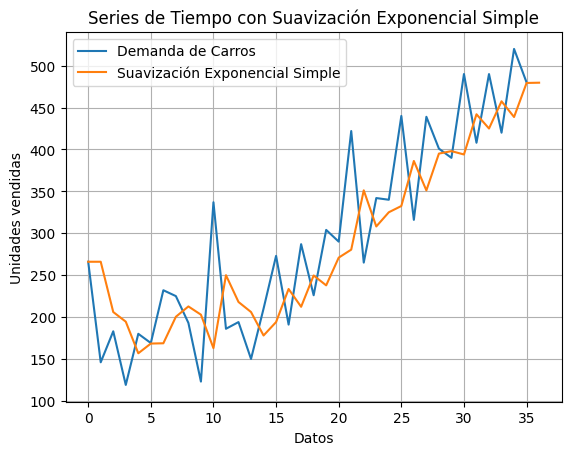

In [14]:
#Graficamos varios de los resultados
plt.plot(df.iloc[:, 1], label = 'Demanda de Carros')
plt.plot(df.iloc[:, 2], label = 'Suavización Exponencial Simple')
plt.grid()
plt.legend(loc = 'best')
plt.title('Series de Tiempo con Suavización Exponencial Simple')
plt.xlabel("Datos")
plt.ylabel("Unidades vendidas")
plt.show()

### MAD

Una medida muy importante utilizada para medir el error global de un tipo de pronóstico es el MAD, el cual es el promedio de los errores. Matemáticamente se define así:

$$ \mathrm{MAD} = \frac{\sum \begin{vmatrix}
\mathrm{Demanda \: Real} - \mathrm{Valor \: Pronosticado}
\end{vmatrix}}{n} $$

In [15]:
#Para que sirva la función, se debe inicializar la variable initial_forecast

initial_forecast = 266

def MAD_Suavizacion_Exponencial_Simple(alpha):

  """
  Calcula el MAD de la Suavización Exponencial tomando en cuenta
  el alpha ingresado

  Args:
    alpha: Constante de suavización exponencial

  Returns:
    mad: Número float con la desviación absoluta media (MAD).
  """

  Simple_Exponential_Smoothing = []

  n = len(df.iloc[:, 1])

  for i in range(n):
    if i == 0:
      Simple_Exponential_Smoothing.append(initial_forecast)
    else:
      actual_value = Simple_Exponential_Smoothing[i - 1] + alpha * (df.iloc[i - 1, 1] - Simple_Exponential_Smoothing[i - 1])
      Simple_Exponential_Smoothing.append(actual_value)

  Errors = []
  Sum = 0

  for i in range(n):
    Error = np.abs(df.iloc[i, 1] - df.iloc[i, 2])
    Errors.append(Error)

  for i in range(n - 1):
    Sum += Errors[i]

  mad = Sum / (n - 1)

  return mad

In [16]:
# Calculamos el MAD
MAD_Suavizacion_Exponencial_Simple(0.5)

54.321179494374924

In [17]:
#Una función para lo mismo creada de otra manera
def calcular_mad(alpha):
  from statsmodels.tsa.holtwinters import SimpleExpSmoothing
  model = SimpleExpSmoothing(df["Sales"], initialization_method="known", initial_level = 266)
  model_fit = model.fit(smoothing_level = alpha, optimized=False)

  data_r = df["Sales"][:-1]
  data_p = model_fit.fittedvalues[:-1]

  mad = np.mean(np.abs(data_r-data_p))

  return mad

In [18]:
#Otra forma de Calcular el MAD
calcular_mad(0.5)

54.321179494374924

### Optimización del Alpha

Ahora bien, haciéndo uso de los conocimientos de Analítica I y Matemáticas Aplicadas I, se puede minimizar la función objetivo MAD para obtener el mínimo error.

$ \mathbf{f.o.} $
$$ \mathit{min} \: \: \mathrm{MAD} = \frac{\sum \begin{vmatrix}
\mathrm{Demanda \: Real} - \mathrm{Valor \: Pronosticado}
\end{vmatrix}}{n} $$

$ \mathbf{s.a.} $
$$0 \leq \alpha \leq 1$$

donde,

$ \alpha = \mathrm{Constante \: de \: Suavizacion}$

In [19]:
#Realizando la optimización

from scipy import optimize

initial_alpha = 0.8

def c1(X):
  alpha = X
  return alpha
def c2(X):
  alpha = X
  return -(alpha - 1.0)
def c3(X):
    'positivity constraint'
    return X[0]

bnds = [(0.0, 1.0)]

result = optimize.minimize(calcular_mad, initial_alpha, constraints = [{'type':'ineq','fun':f} for f in [c1,c2,c3]], bounds = bnds, method = 'SLSQP')

In [20]:
#Alpha óptimo
result.x[0]

0.3724978127164714

In [21]:
#MAD resultante
Optimized_MAD = result.fun
print(Optimized_MAD)

53.14805526722676


### Referencias
*   Heizer, J., & Render, B. (2004). Principios de administración de operaciones.
*   Lind, D. A., Marchal, W. G., & Wathen, S. A. (2005). Estadística aplicada a los negocios y a la economía.